<a href="https://colab.research.google.com/github/rcgonzsv/melanoma_detection/blob/master/melanoma_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install -q kaggle

In [0]:
#from google.colab import files

#files.upload()

In [0]:
#!mkdir ~/.kaggle

In [0]:
#!cp kaggle.json ~/.kaggle/

In [0]:
#!chmod 600 ~/.kaggle/kaggle.json

In [0]:
#Look for database
#!kaggle datasets list -s melanoma

In [0]:
#!kaggle datasets download "wanderdust/skin-lesion-analysis-toward-melanoma-detection"

In [0]:
#!unzip '/content/drive/My Drive/Datasets/skin-lesion-analysis-toward-melanoma-detection.zip' -d '/content/drive/My Drive/Datasets'

In [0]:
#load images
import cv2
import glob

images = [cv2.imread(file) for file in glob.glob("/content/drive/My Drive/Datasets/skin-lesions/valid/melanoma/*.jpg")]

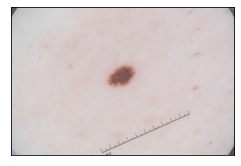

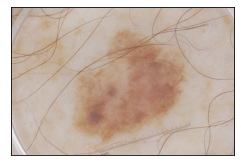

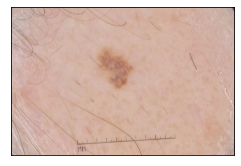

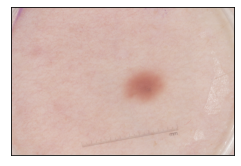

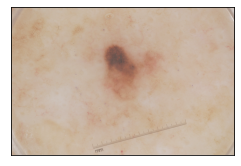

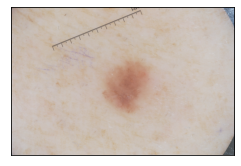

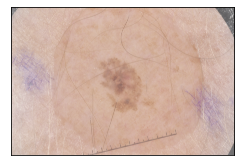

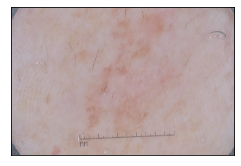

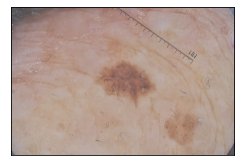

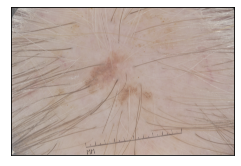

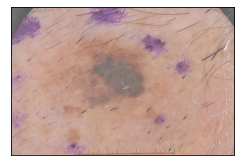

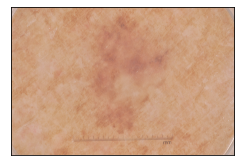

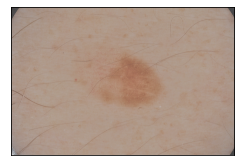

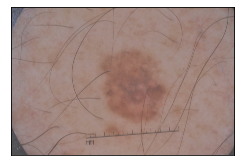

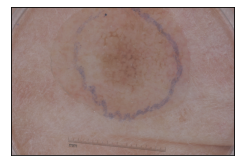

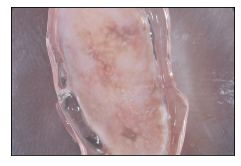

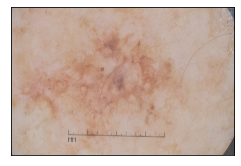

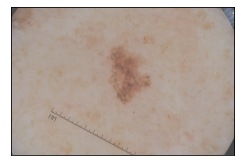

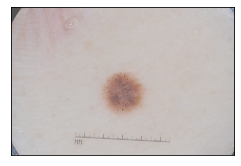

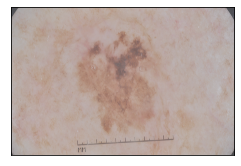

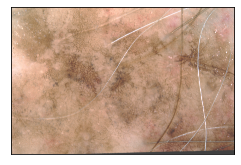

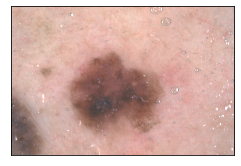

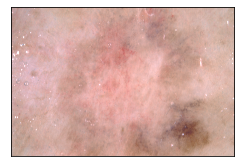

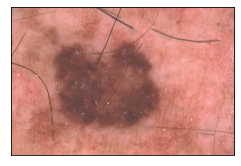

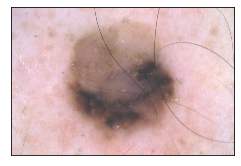

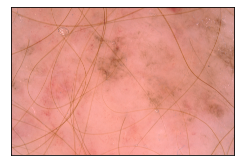

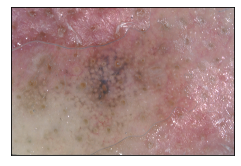

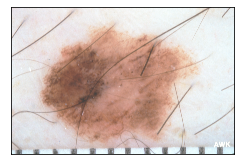

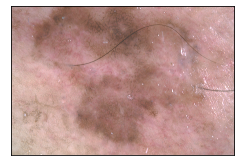

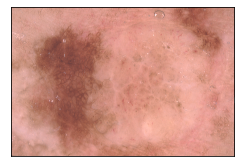

In [0]:
#show images
import os
import matplotlib.pyplot as plt

%matplotlib inline

for image in images:
  im_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(4,4))
  plt.imshow(im_rgb, alpha=0.75)
  plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
  plt.show()

In [0]:
#pip install pydicom

In [0]:
import numpy as np 
import pandas as pd 
import os
from glob import glob
%matplotlib inline
#%matplotlib notebook

import matplotlib
matplotlib.colors
matplotlib.colors.rgb_to_hsv
matplotlib.colors.to_rgba
matplotlib.figure.Figure.get_size_inches
matplotlib.figure.Figure.subplots_adjust
matplotlib.axes.Axes.text
matplotlib.axes.Axes.hlines

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image
import seaborn as sns
import pydicom
import skimage
from itertools import chain
import random
from random import sample 
import scipy
from skimage.io import imread, imshow
from sklearn.preprocessing import binarize
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, plot_precision_recall_curve, f1_score, confusion_matrix

In [0]:
## Load training data
import pandas as pd

path = '/content/drive/My Drive/Colab Notebooks/Healthcare Individual Projects/Team Melanoma/train.csv'
train_df = pd.read_csv(path)
train_df.sample(10)

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
8056,ISIC_2509329,IP_7890415,male,60.0,torso,unknown,benign,0
21212,ISIC_6437087,IP_7318404,male,50.0,lower extremity,unknown,benign,0
16319,ISIC_4992060,IP_2669371,female,50.0,torso,nevus,benign,0
9380,ISIC_2910705,IP_7842255,female,65.0,torso,unknown,benign,0
27921,ISIC_8448473,IP_8215360,female,55.0,lower extremity,unknown,benign,0
9993,ISIC_3098750,IP_8349964,male,70.0,head/neck,unknown,benign,0
13156,ISIC_4045248,IP_2934687,female,40.0,lower extremity,unknown,benign,0
9327,ISIC_2895308,IP_4576977,male,45.0,torso,unknown,benign,0
1648,ISIC_0596942,IP_7291657,female,40.0,torso,unknown,benign,0
2468,ISIC_0836854,IP_8640021,male,30.0,upper extremity,unknown,benign,0


In [0]:
## Split up my "Finding Labels" column so that I have one column in my dataframe
# per disease, with a binary flag. This makes EDA a lot easier! 

all_labels = np.unique(list(chain(train_df['diagnosis'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        train_df[c_label] = train_df['diagnosis'].map(lambda finding: 1.0 if c_label in finding else 0)
train_df.sample(3)

All Labels (9): ['atypical melanocytic proliferation', 'cafe-au-lait macule', 'lentigo NOS', 'lichenoid keratosis', 'melanoma', 'nevus', 'seborrheic keratosis', 'solar lentigo', 'unknown']


,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,atypical melanocytic proliferation,cafe-au-lait macule,lentigo NOS,lichenoid keratosis,melanoma,nevus,seborrheic keratosis,solar lentigo,unknown
19680,ISIC_5976039,IP_6292705,male,55.0,head/neck,unknown,benign,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13772,ISIC_4227377,IP_5174964,male,30.0,upper extremity,unknown,benign,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1102,ISIC_0434532,IP_6342052,male,65.0,torso,unknown,benign,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


[Text(0, 0.5, 'Number of Images with Label')]

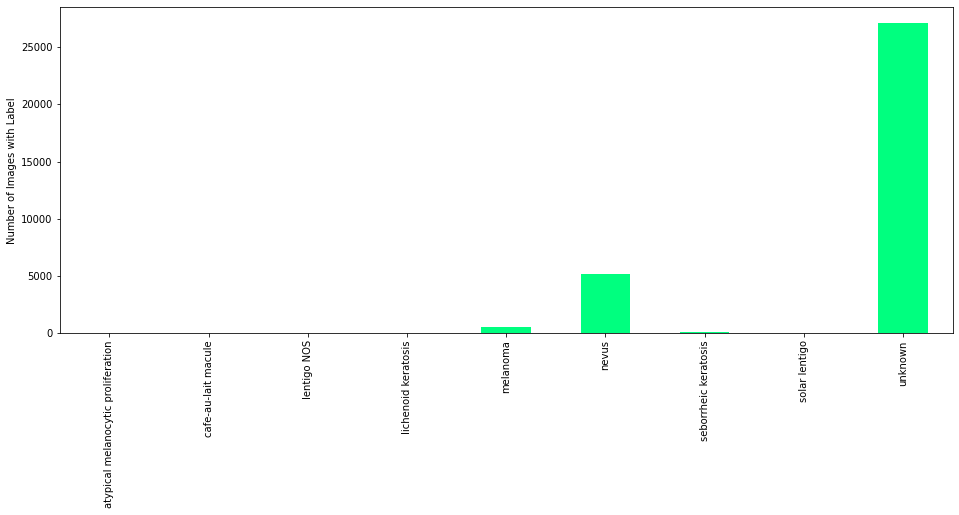

In [0]:
plt.figure(figsize=(16,6))
ax = train_df[all_labels].sum().plot(kind='bar',color='springgreen')
ax.set(ylabel = 'Number of Images with Label')

In [0]:
no_unknown_df = train_df

In [0]:
melanoma_cases = int(train_df['melanoma'].sum())
total_sample = len(train_df['patient_id'])
benign_cases = total_sample - melanoma_cases
percentage_melanoma = round((melanoma_cases/total_sample)*100)

print('The total of melanoma cases are: '+ str(melanoma_cases))
print('Benign cases: ' + str(benign_cases))
print ("Melanoma Cases: {}%".format(percentage_melanoma))



The total of melanoma cases are: 584
Benign cases: 32542
Melanoma Cases: 2%


In [0]:
#Detected Melanoma
train_df[train_df['melanoma']==0]['diagnosis'].value_counts()

unknown                               27124
nevus                                  5193
seborrheic keratosis                    135
lentigo NOS                              44
lichenoid keratosis                      37
solar lentigo                             7
cafe-au-lait macule                       1
atypical melanocytic proliferation        1
Name: diagnosis, dtype: int64

In [0]:
(train_df[all_labels].sum()/len(train_df))*100

atypical melanocytic proliferation     0.003019
cafe-au-lait macule                    0.003019
lentigo NOS                            0.132826
lichenoid keratosis                    0.111695
melanoma                               1.762966
nevus                                 15.676508
seborrheic keratosis                   0.407535
solar lentigo                          0.021131
unknown                               81.881302
dtype: float64

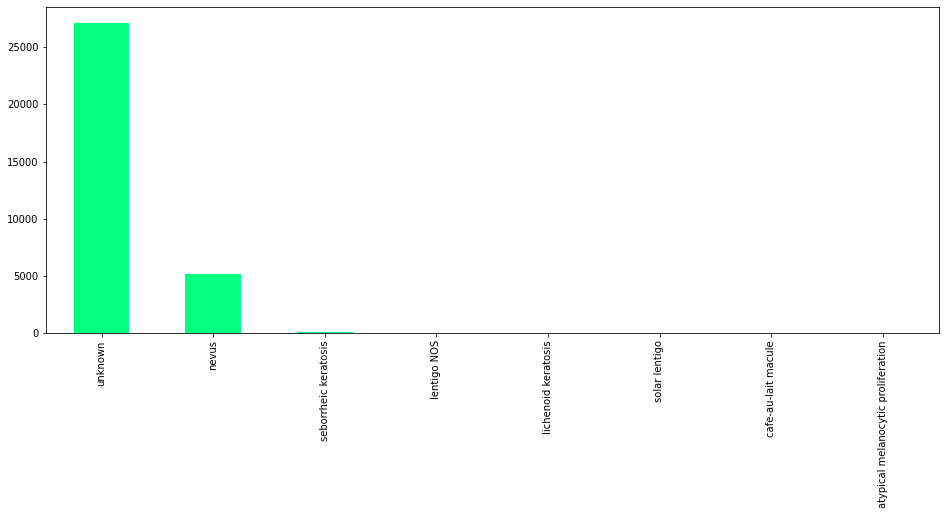

In [0]:
##Most ocurrences
plt.figure(figsize=(16,6))
train_df[train_df.melanoma==0]['diagnosis'].value_counts()[0:10].plot(kind='bar',color='springgreen')

male count: 17080
female count: 16046


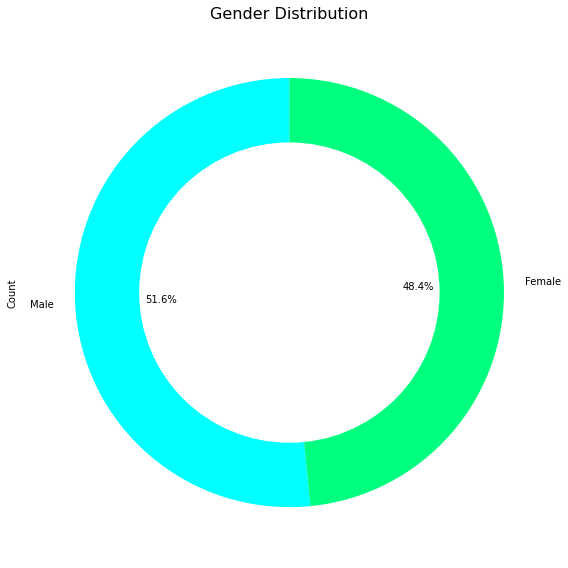

In [0]:
colors = ['aqua','springgreen']

gender = {}
male_cnt = len(train_df[train_df["sex"] == "male"])
gender['Count'] = [male_cnt, len(train_df) - male_cnt]
gender['Gender'] = ['Male', 'Female']
gender_df = pd.DataFrame(gender, columns = ['Gender', 'Count'])
gender_df.plot.pie(y = 'Count', autopct='%1.1f%%', startangle=90, shadow=False, labels=gender_df['Gender'], colors=colors, legend = False, fontsize=10, figsize=(8, 8))
plt.title("Gender Distribution", fontsize=16)
print("male count:", male_cnt)
print("female count:", len(train_df)-male_cnt)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)  
plt.tight_layout()
plt.show()

In [0]:
melanoma_df = train_df[ (train_df['melanoma'] == 1)]

male count: 364
female count: 220


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


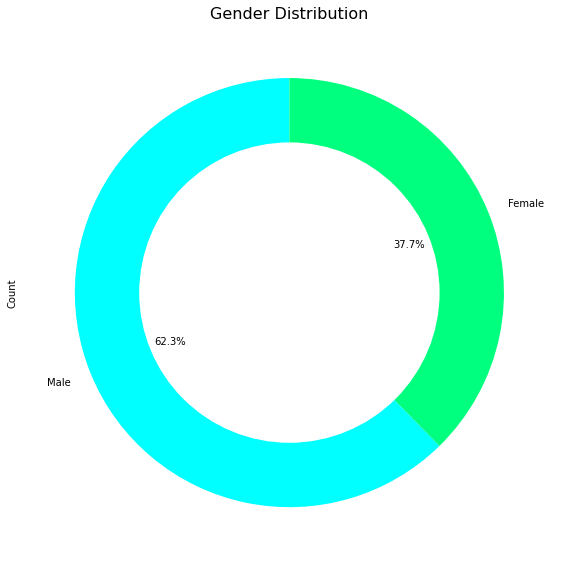

In [0]:
colors = ['aqua','springgreen']

gender = {}
male_cnt = len(melanoma_df[train_df["sex"] == "male"])
gender['Count'] = [male_cnt, len(melanoma_df) - male_cnt]
gender['Gender'] = ['Male', 'Female']
gender_df = pd.DataFrame(gender, columns = ['Gender', 'Count'])
gender_df.plot.pie(y = 'Count', autopct='%1.1f%%', startangle=90, shadow=False, labels=gender_df['Gender'], colors=colors, legend = False, fontsize=10, figsize=(8, 8))
plt.title("Gender Distribution", fontsize=16)
print("male count:", male_cnt)
print("female count:", len(melanoma_df)-male_cnt)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)  
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([2.000e+00, 1.700e+01, 1.320e+02, 6.550e+02, 1.544e+03, 5.208e+03,
        3.576e+03, 4.466e+03, 4.270e+03, 3.824e+03, 5.767e+03, 1.968e+03,
        9.810e+02, 4.190e+02, 2.290e+02]),
 array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 60., 66., 72.,
        78., 84., 90.]),
 <a list of 15 Patch objects>)

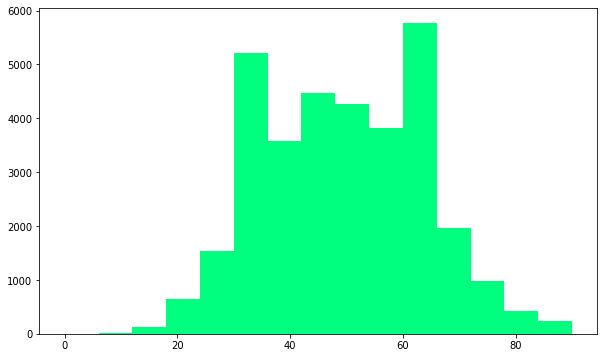

In [0]:
# Distribution by Age : Total Patient
plt.figure(figsize=(10,6))
plt.hist(train_df['age_approx'],color='springgreen', bins = 15
         )

(array([ 2.,  6., 16., 24., 25., 24., 54., 53., 64., 65., 70., 58., 62.,
        36., 25.]),
 array([15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70., 75.,
        80., 85., 90.]),
 <a list of 15 Patch objects>)

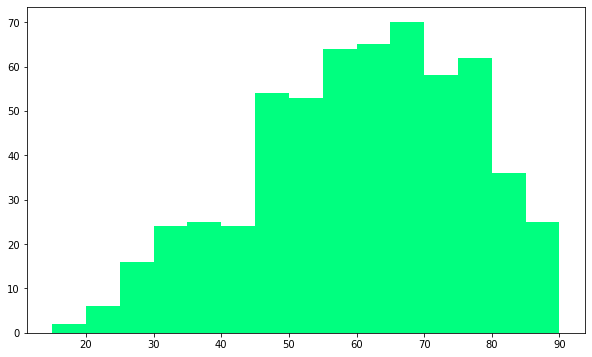

In [0]:
# Distribution by Age: Patients with Melanoma
plt.figure(figsize=(10,6))
plt.hist(train_df[train_df.melanoma==1]['age_approx'],color='springgreen',bins = 15)

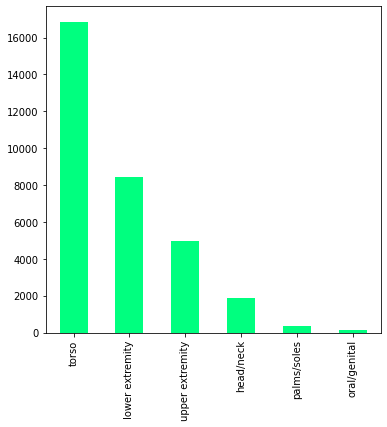

In [0]:
#Anatomy Site
plt.figure(figsize=(6,6))
train_df['anatom_site_general_challenge'].value_counts().plot(kind='bar',color='springgreen')

In [0]:
## Load test data
test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Healthcare Individual Projects/Team Melanoma/test.csv')
test_df.sample(3)

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
5716,ISIC_5234098,IP_4665747,female,80.0,lower extremity
9126,ISIC_8301281,IP_3139273,female,75.0,torso
4377,ISIC_4033845,IP_3872004,male,45.0,lower extremity
